# Importing Libarries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [2]:
df=pd.read_csv(r'C:\Users\merug\Downloads/project-23,,batch-2/Project -23 train_loanPrediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Calculating Precentage of null values

In [4]:
df.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

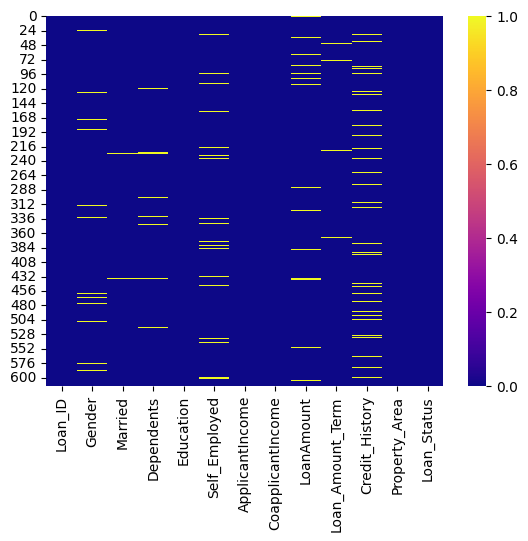

In [6]:
sns.heatmap(df.isnull(),cmap='plasma')

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [8]:
df1=df.iloc[:,0:]

# Filling the Null Values With Data

In [9]:
df['Gender'] = df['Gender'].fillna(df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna(df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().median() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].dropna().mode().values[0] )

In [10]:
df[0:30]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


# Ecoding the Non-Numerical to Numerical (Data Encoding)

In [11]:
code_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}
df = df.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
#drop the uniques loan id
df.drop('Loan_ID', axis = 1, inplace = True)


In [12]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,128.0,360.0,1.0,3,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,3,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,2,0,1,2,2900,0.0,71.0,360.0,1.0,1,1
610,1,1,3,1,2,4106,0.0,40.0,180.0,1.0,1,1
611,1,1,1,1,2,8072,240.0,253.0,360.0,1.0,3,1
612,1,1,2,1,2,7583,0.0,187.0,360.0,1.0,3,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


# Recheck for Null Values 

In [14]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [15]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Gender,0,0.0
Married,0,0.0
Dependents,0,0.0
Education,0,0.0
Self_Employed,0,0.0
ApplicantIncome,0,0.0
CoapplicantIncome,0,0.0
LoanAmount,0,0.0
Loan_Amount_Term,0,0.0
Credit_History,0,0.0


<Axes: >

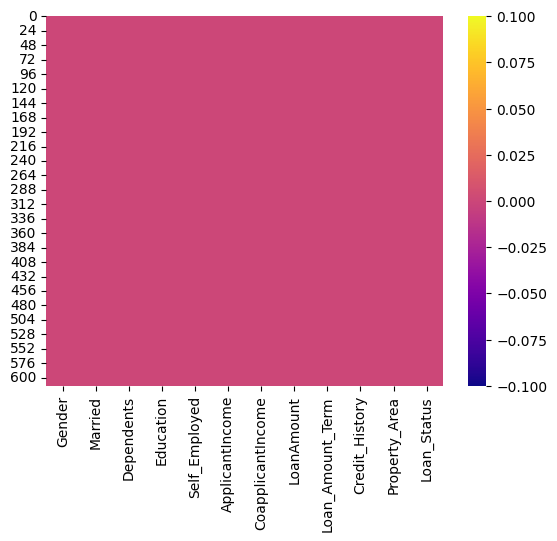

In [16]:
sns.heatmap(df.isnull(),cmap='plasma')

<Axes: >

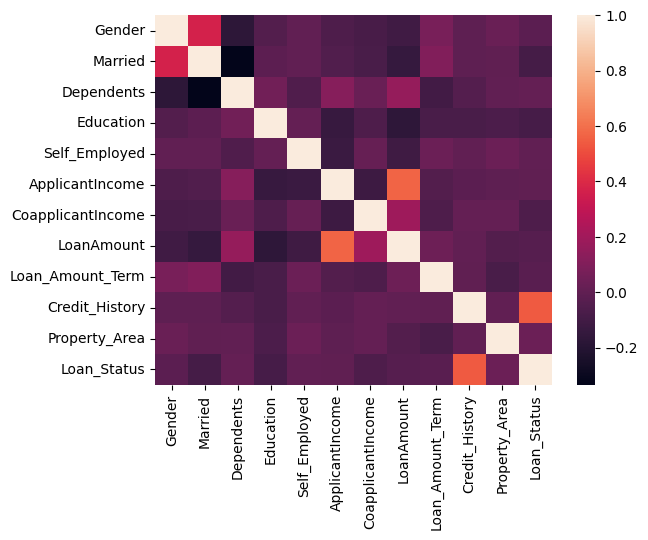

In [17]:
sns.heatmap(df.corr())

# Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

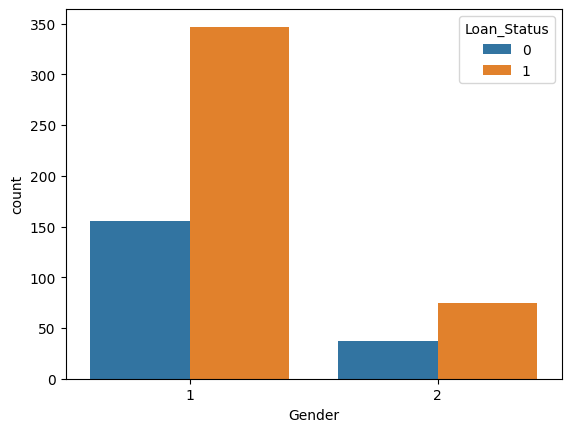

In [18]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

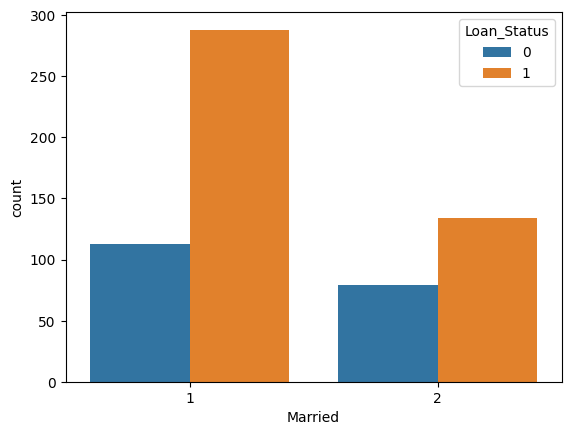

In [19]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

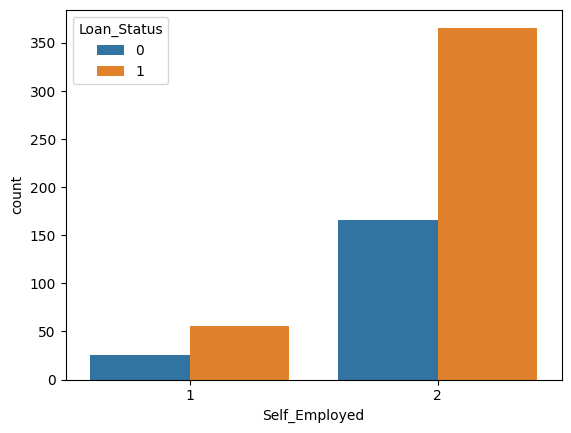

In [20]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

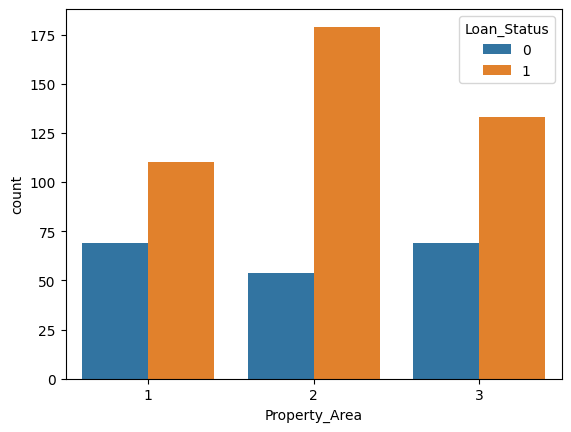

In [21]:
#sns.countplot(df['Property_Area'],hue=df['Loan_Status'])
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

<Axes: xlabel='Credit_History', ylabel='count'>

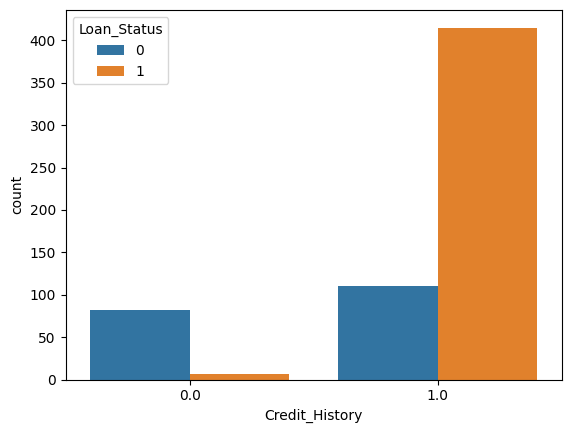

In [22]:
#sns.countplot(df['Credit_History'],hue=df['Loan_Status'])
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

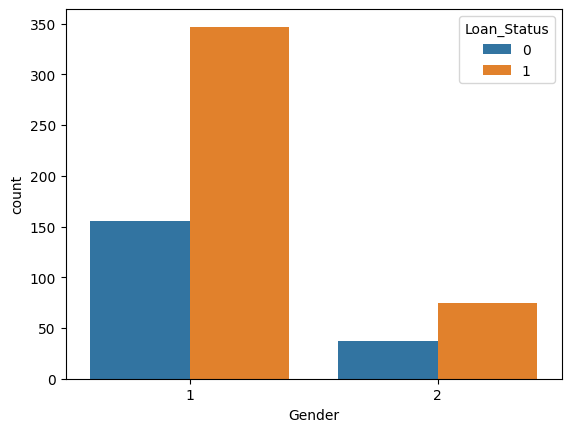

In [23]:
#sns.countplot(df['Gender'],hue=df['Loan_Status'])
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

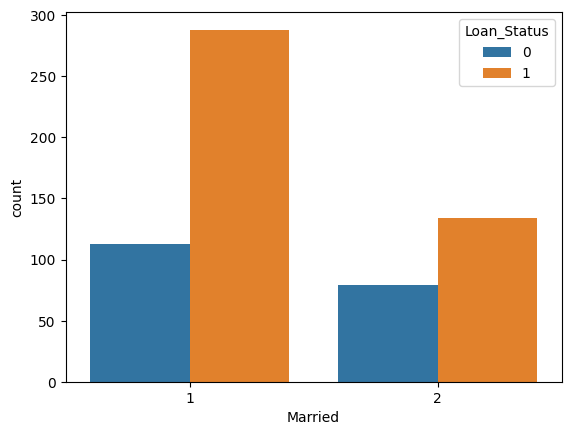

In [24]:
#print(pd.crosstab(df['Married'],df['Loan_Status']))
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Self_Employed', ylabel='count'>

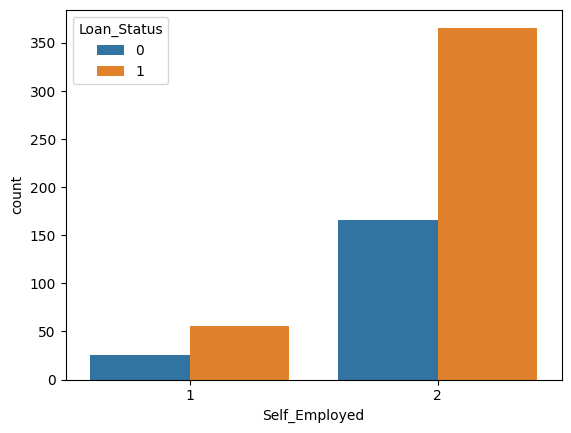

In [25]:
#sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)


<Axes: xlabel='Education', ylabel='count'>

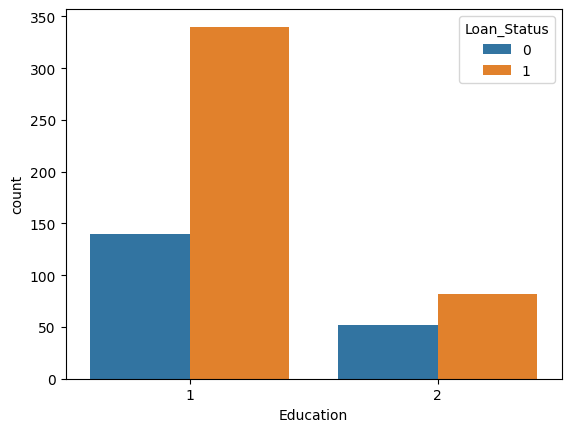

In [26]:
#sns.countplot(df['Education'],hue=df['Loan_Status'])
sns.countplot(x='Education',hue='Loan_Status',data=df)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


# Spllitting the Data 

In [28]:
y = df['Loan_Status']
X = df.drop('Loan_Status', axis = 1)

In [29]:
X=np.array(X)

In [30]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

# Logistic regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
#from sklearn.model_selection import GridSearchCV
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=26)

In [33]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [35]:
ypred_l= model.predict(X_test)
#evaluation = f1_score(y_test, ypred_l)

In [36]:

#evaluation

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [38]:
cm = confusion_matrix(y_test, ypred_l)
cm

array([[11, 20],
       [ 3, 89]], dtype=int64)

In [39]:
Log=accuracy_score(y_test, ypred_l)*100

In [40]:
data={'y_test':y_test,'pred':ypred_l}
pd.DataFrame(data=data)

,y_test,pred
324,1,1
278,1,1
523,1,0
410,0,1
339,1,1
...,...,...
328,0,1
464,0,0
456,1,1
295,1,1


In [41]:
print("Accuracy:",accuracy_score(y_test, ypred_l)*100)

Accuracy: 81.30081300813008


# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import os

In [43]:
dc=DecisionTreeClassifier(criterion="entropy",random_state=0)
dc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
ypred_d = dc.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
dec=accuracy_score(y_test,ypred_d)*100

In [46]:
data={'y_test':y_test,'pred':ypred_d}
pd.DataFrame(data=data)

,y_test,pred
324,1,1
278,1,1
523,1,1
410,0,1
339,1,1
...,...,...
328,0,1
464,0,0
456,1,1
295,1,1


In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, ypred_d)*100)

Accuracy: 75.60975609756098


# Random Forest Classifer

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc= RandomForestClassifier()

In [50]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [51]:
ypred_r = rfc.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_r)
cm

array([[11, 20],
       [ 2, 90]], dtype=int64)

In [53]:

# Check Accuracy 
from sklearn.metrics import accuracy_score
rf=accuracy_score(y_test,ypred_r)*100

In [54]:
data={'y_test':y_test,'pred':ypred_r}
pd.DataFrame(data=data)

,y_test,pred
324,1,1
278,1,1
523,1,1
410,0,1
339,1,1
...,...,...
328,0,1
464,0,0
456,1,1
295,1,1


In [55]:
print("Accuracy:",metrics.accuracy_score(y_test, ypred_r))

Accuracy: 0.8211382113821138


# SVM

In [56]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [57]:
ypred_s = classifier.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_s)
cm

array([[11, 20],
       [ 0, 92]], dtype=int64)

In [59]:
data={'y_test':y_test,'pred':ypred_s}
pd.DataFrame(data=data)

,y_test,pred
324,1,1
278,1,1
523,1,1
410,0,1
339,1,1
...,...,...
328,0,1
464,0,0
456,1,1
295,1,1


In [60]:

# Check Accuracy 
from sklearn.metrics import accuracy_score
svm=accuracy_score(y_test,ypred_s)*100
print("Accuracy:",metrics.accuracy_score(y_test, ypred_s)*100)

Accuracy: 83.73983739837398


In [61]:
# Applying k-Fold Cross Validation
#from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

#accuracies.mean()
# accuracies.std()

# Neural Network

In [62]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [63]:
X

array([[2, '0', 1, ..., 360.0, 1.0, 3],
       [1, '1', 1, ..., 360.0, 1.0, 1],
       [1, '0', 1, ..., 360.0, 1.0, 3],
       ...,
       [1, '1', 1, ..., 360.0, 1.0, 3],
       [1, '2', 1, ..., 360.0, 1.0, 3],
       [2, '0', 1, ..., 360.0, 0.0, 2]], dtype=object)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=0)

In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
print(X_train)

[[-0.71143163 -0.76304669 -0.53102197 ...  0.26983787  0.41790088
  -0.05166631]
 [ 1.40561644  0.22549137 -0.53102197 ...  0.26983787  0.41790088
  -0.05166631]
 [-0.71143163 -0.76304669 -0.53102197 ...  0.26983787 -2.39291191
  -1.32007414]
 ...
 [-0.71143163  2.2025675  -0.53102197 ...  0.26983787  0.41790088
  -0.05166631]
 [-0.71143163 -0.76304669  1.88316125 ...  0.26983787  0.41790088
   1.21674153]
 [-0.71143163 -0.76304669 -0.53102197 ...  0.26983787  0.41790088
  -0.05166631]]


In [67]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

import matplotlib.pyplot as plt

In [68]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [69]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [70]:
model.fit(X_train, y_train, batch_size =32, epochs =100)


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6866 - accuracy: 0.5682
Epoch 2/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6711 - accuracy: 0.6212
Epoch 3/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.6314
Epoch 4/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6469 - accuracy: 0.6314
Epoch 5/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6375 - accuracy: 0.6599
Epoch 6/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6286 - accuracy: 0.6619
Epoch 7/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6204 - accuracy: 0.6640
Epoch 8/100
16/16 [==============================] - 0s 969us/step - loss: 0.6137 - accuracy: 0.6660
Epoch 9/100
16/16 [==============================] - 0s 936us/step - loss: 0.6068 - accuracy: 0.6660
Epoch 10/100
16/16 [==============================] - 0s 1ms/step - loss: 0.6007 - accuracy: 0.6680
Epoch

In [71]:
history = model.fit(X_train, y_train,validation_split = 0.1, epochs=50, batch_size=4)


Epoch 1/50
111/111 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.8141 - val_loss: 0.4893 - val_accuracy: 0.7800
Epoch 2/50
111/111 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8141 - val_loss: 0.4848 - val_accuracy: 0.7800
Epoch 3/50
111/111 [==============================] - 0s 1ms/step - loss: 0.4295 - accuracy: 0.8118 - val_loss: 0.4910 - val_accuracy: 0.7800
Epoch 4/50
111/111 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.8141 - val_loss: 0.4866 - val_accuracy: 0.7800
Epoch 5/50
111/111 [==============================] - 0s 1ms/step - loss: 0.4260 - accuracy: 0.8141 - val_loss: 0.4924 - val_accuracy: 0.7800
Epoch 6/50
111/111 [==============================] - 0s 1ms/step - loss: 0.4248 - accuracy: 0.8163 - val_loss: 0.5011 - val_accuracy: 0.7800
Epoch 7/50
111/111 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.8141 - val_loss: 0.4967 - val_accuracy: 0.7800
Epoch 

# Model Accuracy And Loss Visualization

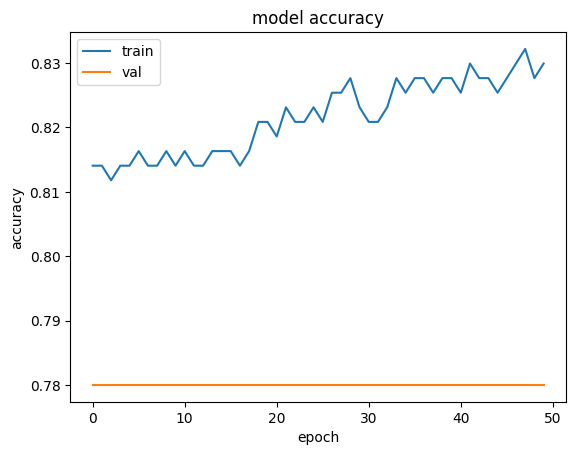

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

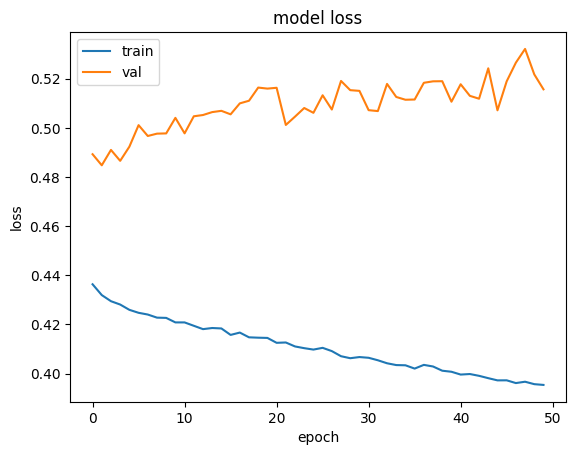

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [74]:
ypred_n = model.predict(X_test)
ypred_n = (ypred_n > 0.5)
print(np.concatenate((ypred_n.reshape(len(ypred_n),1),y_test.reshape(len(y_test),1)),1))

4/4 [==============================] - 0s 2ms/step
[[1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, ypred_n)
print(cm)
neural=accuracy_score(y_test, ypred_n)*100
print("Accuracy:",metrics.accuracy_score(y_test, ypred_n)*100)

[[14 19]
 [ 3 87]]
Accuracy: 82.11382113821138


# AdaBoost Algorithm

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
ad=AdaBoostClassifier()

In [78]:
ad.fit(X_train,y_train)

AdaBoostClassifier()

In [79]:
ypred_ad=ad.predict(X_test)

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred_ad)
cm

array([[17, 16],
       [ 6, 84]], dtype=int64)

In [81]:

# Check Accuracy 
from sklearn.metrics import accuracy_score
ada=accuracy_score(y_test,ypred_ad)*100

In [82]:
data={'y_test':y_test,'pred':ypred_ad}
pd.DataFrame(data=data)

,y_test,pred
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1
...,...,...
118,1,1
119,1,1
120,1,1
121,0,0


In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, ypred_ad)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test, ypred_ad)*100)

[[17 16]
 [ 6 84]]
Accuracy: 82.11382113821138


# Choose the Best Model

In [84]:
from prettytable import PrettyTable
x = PrettyTable(["Model", "Score"])

x.add_row(["Logistic Regression",Log ])
x.add_row(["Decision Tree",dec])
x.add_row(["Random Forest", rf])
x.add_row(["Support Vector Machines", svm])
x.add_row(["Neural Network", neural])
x.add_row(["Ada Boost", ada])
x.sortby = "Score"
x.reversesort = True
print(x)

+-------------------------+-------------------+
|          Model          |       Score       |
+-------------------------+-------------------+
| Support Vector Machines | 83.73983739837398 |
|      Random Forest      | 82.11382113821138 |
|      Neural Network     | 82.11382113821138 |
|        Ada Boost        | 82.11382113821138 |
|   Logistic Regression   | 81.30081300813008 |
|      Decision Tree      | 75.60975609756098 |
+-------------------------+-------------------+
